11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.2315 - val_loss: 0.1126
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1115 - val_loss: 0.1050
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1054 - val_loss: 0.1015
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1024 - val_loss: 0.0997
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1004 - val_loss: 0.0983
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0989 - val_loss: 0.0973
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0980 - val_loss: 0.0966
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0971 - val_loss: 0.0960
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0964 - val_loss: 0.0955
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0959 - val_loss: 0.0950
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


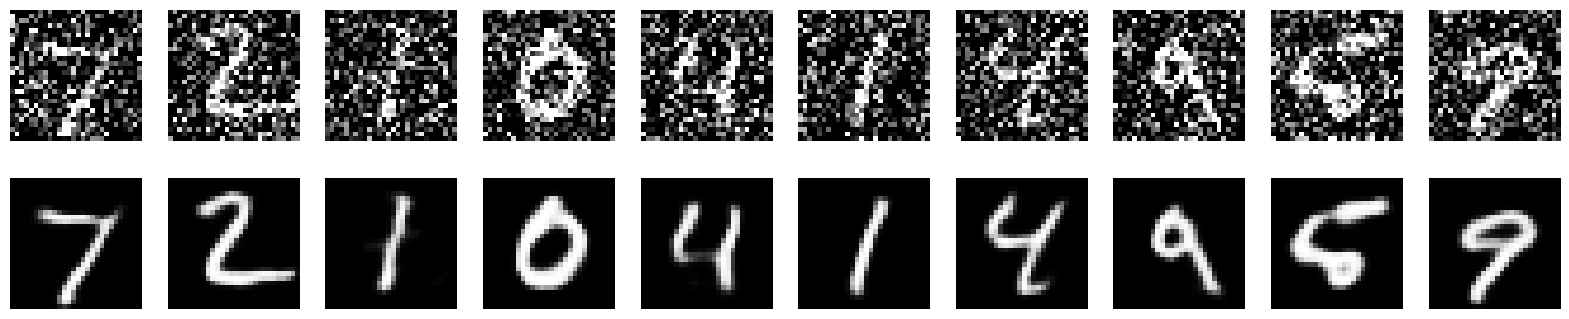

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.1680 - val_loss: 0.0734
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0733 - val_loss: 0.0699
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0701 - val_loss: 0.0686
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0685 - val_loss: 0.0672
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0676 - val_loss: 0.0668
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0668 - val_loss: 0.0659
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0663 - val_loss: 0.0657
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0659 - val_loss: 0.0651
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0654 - val_loss: 0.0647
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0651 - val_loss: 0.0644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


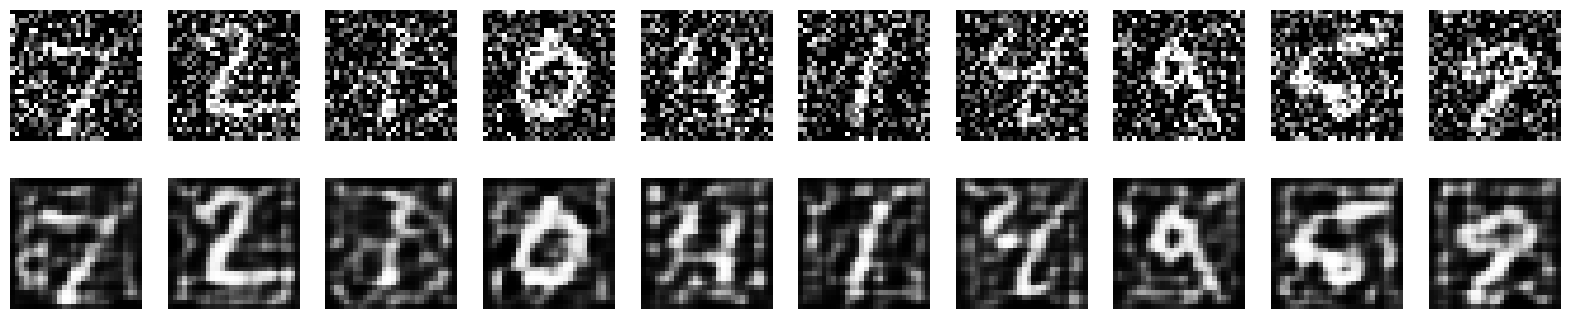

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to include the color channels (for grayscale, we use 1 channel)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Function to add Gaussian noise to images
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Ensure pixel values are in the range [0, 1]
    return noisy_images

# Create noisy images
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Define the denoising autoencoder model
def build_denoising_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded_img = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Build and train the denoising autoencoder
autoencoder = build_denoising_autoencoder()
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

# Visualize noisy vs. reconstructed images
noisy_images = x_test_noisy[:10]
reconstructed_images = autoencoder.predict(noisy_images)

plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy images
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

# Define the basic autoencoder model (no noise in input)
def build_basic_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded_img = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Build and train the basic autoencoder
basic_autoencoder = build_basic_autoencoder()
basic_autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Visualize noisy vs. reconstructed images from the basic autoencoder
reconstructed_basic_images = basic_autoencoder.predict(noisy_images)

plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy images
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images from basic autoencoder
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_basic_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

